# FINANZAS CORPORATIVAS



*   Jisbeth Jaquelin Díaz Vázquez 1857602
*   Julio César Ramiro Mayorga 1842201





# Frontera Eficiente de Markowitz
Es aquella que dado un mismo nivel de volatilidad busca maximizar el retorno esperado



In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
AMX=yf.Ticker("AMXL.MX").history(period="2y")
ASUR=yf.Ticker("ASURB.MX").history(period="2y")
BIMBO=yf.Ticker("BIMBOA.MX").history(period="2y")
CEMEX=yf.Ticker("CEMEXCPO.MX").history(period="2y")
FEMSA=yf.Ticker("FEMSAUBD.MX").history(period="2y")
GAP=yf.Ticker("GAPB.MX").history(period="2y")
GFNORTE=yf.Ticker("GFNORTEO.MX").history(period="2y")
GMEXICO=yf.Ticker("GMEXICOB.MX").history(period="2y")
TLEVISA=yf.Ticker("TLEVISACPO.MX").history(period="2y")
WALMEX=yf.Ticker("WALMEX.MX").history(period="2y")

In [113]:
fAMX=yf.Ticker("AMXL.MX").info
fASUR=yf.Ticker("ASURB.MX").info
fBIMBO=yf.Ticker("BIMBOA.MX").info
fCEMEX=yf.Ticker("CEMEXCPO.MX").info
fFEMSA=yf.Ticker("FEMSAUBD.MX").info
fGAP=yf.Ticker("GAPB.MX").info
fGFNORTE=yf.Ticker("GFNORTEO.MX").info
fGMEXICO=yf.Ticker("GMEXICOB.MX").info
fTLEVISA=yf.Ticker("TLEVISACPO.MX").info
fWALMEX=yf.Ticker("WALMEX.MX").info
fAMX["beta"]

0.325795

In [9]:
AMX.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-08,13.893394,13.893394,13.546996,13.631255,48161499,0.0,0
2020-07-09,13.659341,13.659341,13.125700,13.144423,35220083,0.0,0
2020-07-10,13.153787,13.238046,13.013354,13.135062,20180187,0.0,0
2020-07-13,13.228683,13.415925,13.097613,13.144423,35934688,0.0,0
2020-07-14,13.144424,13.303580,12.826112,13.172510,57393258,0.0,0


In [26]:
val=["AMX","ASUR","BIMBO","CEMEX","FEMSA","GAP","GFNORTE","GMEXICO","TLEVISA","WALMEX"]
pf_dat=pd.DataFrame({"AMX": AMX["Close"],"ASUR": ASUR["Close"], "BIMBO": BIMBO["Close"],"CEMEX": CEMEX["Close"], 
                     "FEMSA": FEMSA["Close"], "GAP": GAP["Close"], "GFNORTE": GFNORTE["Close"], "GMEXICO": GMEXICO["Close"],
                    "TLEVISA": TLEVISA["Close"], "WALMEX": WALMEX["Close"]})

In [18]:
pf_dat.head()

,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
Date,,,,,,,,,,
2020-07-08,13.631255,235.162949,37.073799,6.29,128.989700,145.377655,74.518715,48.784298,24.930906,53.758259
2020-07-09,13.144423,224.452042,36.041828,5.99,125.769699,135.890472,74.072105,48.925163,23.799025,53.612103
2020-07-10,13.135062,221.954407,36.176849,5.96,124.752846,134.586685,72.358620,48.123974,23.789183,53.475685
2020-07-13,13.144423,218.156464,35.684978,6.19,123.670074,134.068863,73.005737,50.289822,23.080526,52.511017
2020-07-14,13.172510,215.116257,34.903767,6.13,122.690895,132.099304,72.714081,49.198093,22.923046,52.988480


In [19]:
pf_dat.tail()

,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
Date,,,,,,,,,,
2022-07-04,20.580000,399.339996,69.570000,7.75,142.110001,281.500000,112.559998,84.190002,33.139999,69.790001
2022-07-05,20.680000,393.839996,67.180000,8.01,132.149994,282.829987,112.059998,80.910004,33.299999,69.660004
2022-07-06,20.990000,402.420013,69.910004,8.04,127.050003,293.970001,112.889999,81.309998,33.450001,68.839996
2022-07-07,20.160000,395.459991,69.680000,8.03,123.650002,287.609985,112.180000,84.680000,32.900002,68.900002
2022-07-08,20.299999,395.579987,69.930000,7.98,123.500000,291.619995,113.790001,84.099998,32.730000,68.779999


<AxesSubplot:xlabel='Date'>

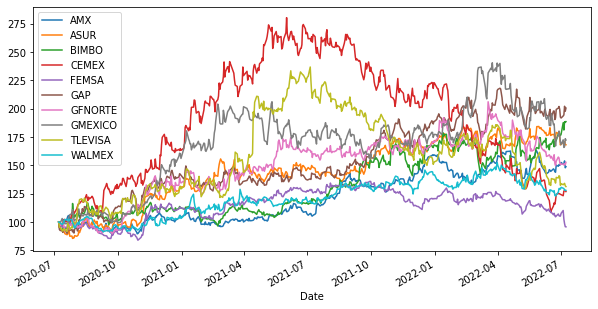

In [20]:
(pf_dat / pf_dat.iloc[0] * 100).plot(figsize=(10, 5))

In [21]:
log_rend = np.log(pf_dat / pf_dat.shift(1))

In [22]:
log_rend.mean() * 250

AMX        0.196767
ASUR       0.256954
BIMBO      0.313530
CEMEX      0.117578
FEMSA     -0.021488
GAP        0.343931
GFNORTE    0.209142
GMEXICO    0.269070
TLEVISA    0.134478
WALMEX     0.121747
dtype: float64

In [23]:
log_rend.cov() * 250

,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
AMX,0.056760,0.017992,0.015032,0.023488,0.020046,0.019851,0.018899,0.019855,0.027972,0.013803
ASUR,0.017992,0.093775,0.018465,0.037338,0.026855,0.068183,0.031577,0.018218,0.032960,0.015386
BIMBO,0.015032,0.018465,0.123990,0.021964,0.016265,0.023049,0.023501,0.020703,0.024373,0.009146
CEMEX,0.023488,0.037338,0.021964,0.173824,0.026484,0.042701,0.045060,0.036377,0.061044,0.019686
FEMSA,0.020046,0.026855,0.016265,0.026484,0.064341,0.026164,0.030024,0.014584,0.031816,0.011783
GAP,0.019851,0.068183,0.023049,0.042701,0.026164,0.107424,0.036837,0.023095,0.041056,0.017925
GFNORTE,0.018899,0.031577,0.023501,0.045060,0.030024,0.036837,0.135875,0.036636,0.042026,0.025140
GMEXICO,0.019855,0.018218,0.020703,0.036377,0.014584,0.023095,0.036636,0.141945,0.033531,0.011535
TLEVISA,0.027972,0.032960,0.024373,0.061044,0.031816,0.041056,0.042026,0.033531,0.166323,0.023963
WALMEX,0.013803,0.015386,0.009146,0.019686,0.011783,0.017925,0.025140,0.011535,0.023963,0.070423


In [24]:
log_rend.corr()

,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
AMX,1.000000,0.246608,0.179182,0.236470,0.331713,0.254226,0.215202,0.221198,0.287894,0.218323
ASUR,0.246608,1.000000,0.171240,0.292447,0.345732,0.679330,0.279745,0.157902,0.263917,0.189337
BIMBO,0.179182,0.171240,1.000000,0.149610,0.182106,0.199717,0.181060,0.156056,0.169722,0.097874
CEMEX,0.236470,0.292447,0.149610,1.000000,0.250433,0.312486,0.293202,0.231583,0.359015,0.177931
FEMSA,0.331713,0.345732,0.182106,0.250433,1.000000,0.314706,0.321112,0.152609,0.307559,0.175052
GAP,0.254226,0.679330,0.199717,0.312486,0.314706,1.000000,0.304907,0.187032,0.307149,0.206091
GFNORTE,0.215202,0.279745,0.181060,0.293202,0.321112,0.304907,1.000000,0.263800,0.279556,0.257003
GMEXICO,0.221198,0.157902,0.156056,0.231583,0.152609,0.187032,0.263800,1.000000,0.218229,0.115376
TLEVISA,0.287894,0.263917,0.169722,0.359015,0.307559,0.307149,0.279556,0.218229,1.000000,0.221417
WALMEX,0.218323,0.189337,0.097874,0.177931,0.175052,0.206091,0.257003,0.115376,0.221417,1.000000


In [29]:
num_val = len(val)
num_val

10

Prueba para Randomizar los Pesos

In [28]:
pesos = np.random.random(num_val)
pesos /= np.sum(pesos)
pesos

array([0.05308968, 0.17759399, 0.15986222, 0.01472123, 0.02843026,
       0.10808055, 0.14013791, 0.09359558, 0.05614078, 0.1683478 ])

Prueba para verificar que los pesos sean <1

In [31]:
pesos[0] + pesos[1] + pesos[2]+ pesos[3]+ pesos[4]+pesos[5]+pesos[6]+pesos[7]+pesos[8]+pesos[9]

1.0

In [91]:
pfolio_rend = []
pfolio_vol = []
aux2=np.empty((100000,10))
for x in range (100000): #Ciclo para generar 10,000 pesos
    pesos = np.random.random(num_val) #Generamos pesos aleatorios entre nuestras 5 empresas
    pesos /= np.sum(pesos) # Nos aseguramos que nuestros pesos sean una suma =1
    aux2[x]=pesos #variable para guardar nuestros pesos
    pfolio_rend.append(np.sum(pesos * log_rend.mean()) * 250) #variable para guardar el rendimiento
    pfolio_vol.append(np.sqrt(np.dot(pesos.T,np.dot(log_rend.cov() * 250, pesos)))) #Variable para guarar la volatilidad
    
pfolio_rend = np.array(pfolio_rend) #Vector de Rendimientos
pfolio_vol = np.array(pfolio_vol) # Vector de Volatilidad

pfolio_rend, pfolio_vol

(array([0.23379909, 0.20704719, 0.16126438, ..., 0.21469413, 0.2000042 ,
        0.19541566]),
 array([0.19761778, 0.20509448, 0.19491942, ..., 0.18208466, 0.19141242,
        0.20206752]))

In [92]:
portafolios = pd.DataFrame({'Rendimiento': pfolio_rend, 'Volatilidad': pfolio_vol})

In [93]:
portafolios.head()

,Rendimiento,Volatilidad
0,0.233799,0.197618
1,0.207047,0.205094
2,0.161264,0.194919
3,0.165783,0.181133
4,0.199941,0.196641


In [94]:
portafolios.tail()

,Rendimiento,Volatilidad
99995,0.196007,0.206530
99996,0.177677,0.201683
99997,0.214694,0.182085
99998,0.200004,0.191412
99999,0.195416,0.202068


Text(0, 0.5, 'Rendimiento Esperado')

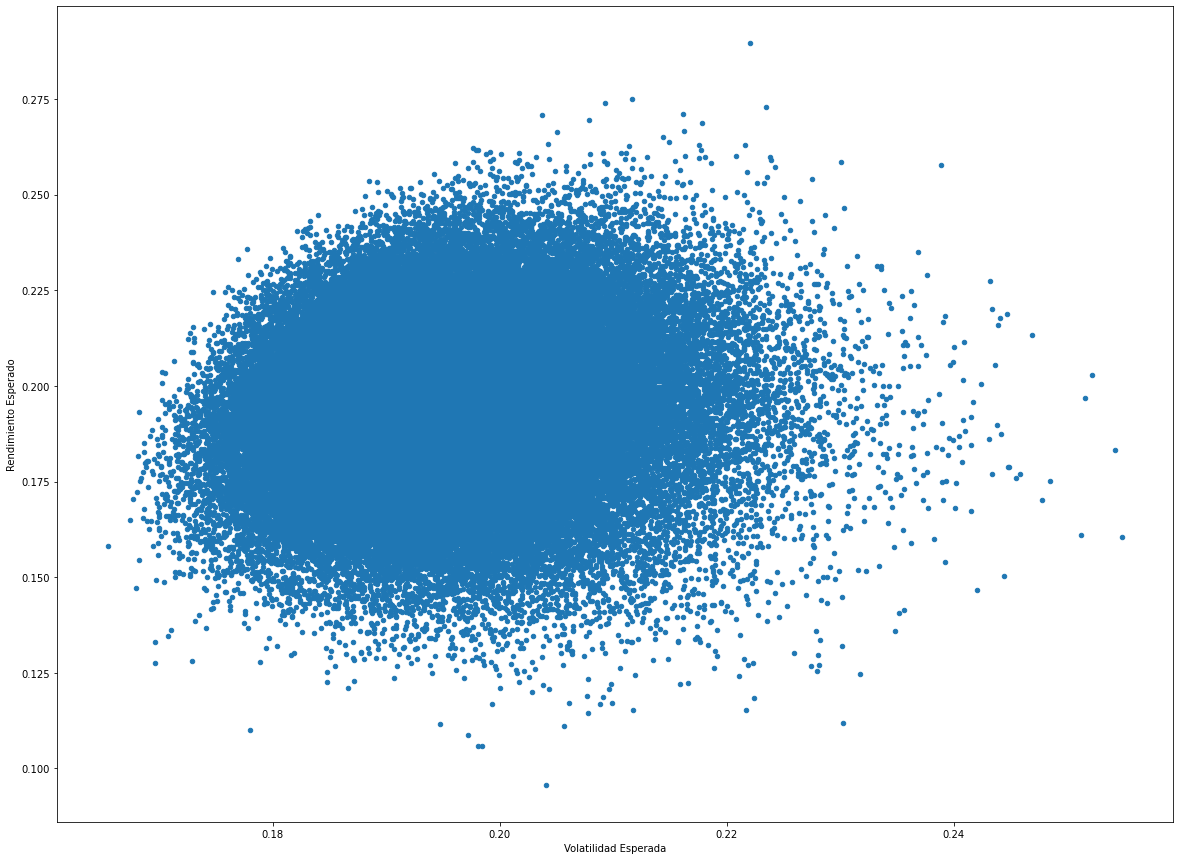

In [95]:
portafolios.plot(x='Volatilidad', y='Rendimiento', kind='scatter', figsize=(20, 15));
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Rendimiento Esperado')

Definimos nuestra Tasa Libre de Riesgo, Cetes 357 dias, tasa convertida a Diara

In [99]:
rf=0.0969/100


Calulamos nuestra Prima de Riesgo

In [100]:
pr=(pfolio_rend-rf)/pfolio_vol
pr

array([1.17818393, 1.00479636, 0.82236744, ..., 1.17376786, 1.03982386,
       0.96228555])

Insertamos la prima de riesgo al portafolio

In [101]:
MP=pd.DataFrame(aux2,columns=["AMX","ASUR","BIMBO","CEMEX","FEMSA","GAP","GFNORTE","GMEXICO","TLEVISA","WALMEX"])


In [102]:
ppr = pd.DataFrame({'Rendimiento': pfolio_rend, 'Volatilidad': pfolio_vol,"Prima de Riesgo":pr,
                    "AMX": MP["AMX"],"ASUR": MP["ASUR"],"BIMBO": MP["BIMBO"],"CEMEX": MP["CEMEX"],"FEMSA": MP["FEMSA"],
                    "GAP": MP["GAP"],"GFNORTE": MP["GFNORTE"],"GMEXICO": MP["GMEXICO"],"TLEVISA": MP["TLEVISA"],
                    "WALMEX": MP["WALMEX"]})

In [103]:
ppr.head()

,Rendimiento,Volatilidad,Prima de Riesgo,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
0,0.233799,0.197618,1.178184,0.177161,0.082631,0.223418,0.092454,0.068217,0.211542,0.019760,0.034832,0.081557,0.008428
1,0.207047,0.205094,1.004796,0.144970,0.097083,0.132874,0.103844,0.010634,0.032277,0.087080,0.137755,0.211708,0.041776
2,0.161264,0.194919,0.822367,0.114204,0.019958,0.058365,0.144722,0.148709,0.074149,0.145415,0.055765,0.122759,0.115955
3,0.165783,0.181133,0.909906,0.075612,0.130609,0.097309,0.052758,0.177844,0.081578,0.003288,0.051672,0.134372,0.194959
4,0.199941,0.196641,1.011855,0.142057,0.033342,0.086394,0.163966,0.033506,0.148729,0.138807,0.038750,0.083118,0.131333


In [104]:
ppr.tail()

,Rendimiento,Volatilidad,Prima de Riesgo,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
99995,0.196007,0.206530,0.944357,0.090931,0.103107,0.019968,0.043218,0.091057,0.148011,0.198134,0.071538,0.168910,0.065127
99996,0.177677,0.201683,0.876167,0.011766,0.060764,0.079696,0.148798,0.084251,0.033777,0.203793,0.121154,0.084184,0.171817
99997,0.214694,0.182085,1.173768,0.179647,0.136595,0.147411,0.065052,0.041519,0.053943,0.026515,0.159969,0.084765,0.104583
99998,0.200004,0.191412,1.039824,0.096661,0.029729,0.150272,0.123752,0.063038,0.136335,0.136661,0.029913,0.084027,0.149611
99999,0.195416,0.202068,0.962286,0.009745,0.110667,0.116032,0.093482,0.045040,0.024629,0.125912,0.162085,0.173416,0.138992


In [105]:
MOb=ppr.sort_values('Prima de Riesgo',ascending=False)

In [106]:
MOb.head().to_csv("Portafolio Optimo.csv")
MOb.head()

,Rendimiento,Volatilidad,Prima de Riesgo,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
19982,0.253594,0.188527,1.339995,0.230191,0.037564,0.202558,0.001287,0.001736,0.238062,0.124886,0.047036,0.013281,0.103400
98147,0.253352,0.189184,1.334064,0.179191,0.164414,0.173188,0.003967,0.016160,0.175078,0.065292,0.136271,0.028863,0.057575
94587,0.270907,0.203726,1.325006,0.111712,0.190198,0.227334,0.043322,0.002936,0.176305,0.041057,0.198669,0.002885,0.005581
81058,0.244658,0.183976,1.324568,0.177978,0.096367,0.199616,0.040168,0.025100,0.203503,0.024740,0.098404,0.010592,0.123531
18518,0.262215,0.197632,1.321882,0.181531,0.175328,0.180870,0.058423,0.002852,0.203965,0.053948,0.128861,0.007166,0.007056


Un ejemplo sería que si nosotros queremos Invertir 30 mil pesos, tendríamos que dividir nuestro dinero asi:

In [107]:
inv=30000
AMX=inv*MOb['AMX']
ASUR=inv*MOb['ASUR']
BIMBO=inv*MOb['BIMBO']
CEMEX=inv*MOb['CEMEX']
FEMSA=inv*MOb['FEMSA']
GAP=inv*MOb['GAP']
GFNORTE=inv*MOb['GFNORTE']
GMEXICO=inv*MOb['GMEXICO']
TLEVISA=inv*MOb['TLEVISA']
WALMEX=inv*MOb['WALMEX']
Port=pd.DataFrame({'AMX': AMX,'ASUR': ASUR, 'BIMBO': BIMBO, 'CEMEX': CEMEX, 'FEMSA': FEMSA, 'GAP': GAP, "GFNORTE": GFNORTE,
                  "GMEXICO": GMEXICO, 'TLEVISA': TLEVISA, 'WALMEX': WALMEX})
Port.head().to_csv("Portafolio Optimo Inv.csv")
Port.head()

,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
19982,6905.744908,1126.909871,6076.753039,38.609639,52.071662,7141.850499,3746.580519,1411.065455,398.422626,3101.991781
98147,5375.744961,4932.434317,5195.644747,119.002984,484.813243,5252.325931,1958.766801,4088.119454,865.899515,1727.248046
94587,3351.361246,5705.940625,6820.031199,1299.667571,88.077895,5289.158323,1231.714302,5960.058493,86.564687,167.425659
81058,5339.352625,2891.015732,5988.474194,1205.054684,753.003495,6105.094853,742.188618,2952.127441,317.767305,3705.921054
18518,5445.938435,5259.846470,5426.103856,1752.698434,85.567539,6118.938951,1618.447423,3865.816130,214.972128,211.670633


En cantidad de acciones seria:

In [108]:
dAMX=yf.Ticker("AMXL.MX").history(period="1d")
dASUR=yf.Ticker("ASURB.MX").history(period="1d")
dBIMBO=yf.Ticker("BIMBOA.MX").history(period="1d")
dCEMEX=yf.Ticker("CEMEXCPO.MX").history(period="1d")
dFEMSA=yf.Ticker("FEMSAUBD.MX").history(period="1d")
dGAP=yf.Ticker("GAPB.MX").history(period="1d")
dGFNORTE=yf.Ticker("GFNORTEO.MX").history(period="1d")
dGMEXICO=yf.Ticker("GMEXICOB.MX").history(period="1d")
dTLEVISA=yf.Ticker("TLEVISACPO.MX").history(period="1d")
dWALMEX=yf.Ticker("WALMEX.MX").history(period="1d")
dWALMEX["Close"][0]

68.55999755859375

In [109]:


cAMX=inv*MOb['AMX']/dAMX["Close"][0]
cASUR=inv*MOb['ASUR']/dASUR["Close"][0]
cBIMBO=inv*MOb['BIMBO']/dBIMBO["Close"][0]
cCEMEX=inv*MOb['CEMEX']/dCEMEX["Close"][0]
cFEMSA=inv*MOb['FEMSA']/dFEMSA["Close"][0]
cGAP=inv*MOb['GAP']/dGAP["Close"][0]
cGFNORTE=inv*MOb['GFNORTE']/dGFNORTE["Close"][0]
cGMEXICO=inv*MOb['GMEXICO']/dGMEXICO["Close"][0]
cTLEVISA=inv*MOb['TLEVISA']/dTLEVISA["Close"][0]
cWALMEX=inv*MOb['WALMEX']/dWALMEX["Close"][0]
PortA=pd.DataFrame({'AMX': cAMX,'ASUR': cASUR, 'BIMBO': cBIMBO, 'CEMEX': cCEMEX, 'FEMSA': cFEMSA, 'GAP': cGAP, "GFNORTE": cGFNORTE,
                  "GMEXICO": cGMEXICO, 'TLEVISA': cTLEVISA, 'WALMEX': cWALMEX})
PortA.head().to_csv("Portafolio Optimo Inv Acciones.csv")
PortA.head()

,AMX,ASUR,BIMBO,CEMEX,FEMSA,GAP,GFNORTE,GMEXICO,TLEVISA,WALMEX
19982,340.016991,2.852214,86.072991,4.784342,0.420407,24.407405,32.942763,16.634038,12.128543,45.244923
98147,264.684643,12.484015,73.592703,14.746343,3.914203,17.949920,17.222956,48.191906,26.359195,25.193234
94587,165.010405,14.441763,96.601011,161.049271,0.711108,18.075796,10.830161,70.258851,2.635150,2.442031
81058,262.892800,7.317175,84.822582,149.325245,6.079473,20.864274,6.525882,34.800511,9.673282,54.053693
18518,268.140747,13.312697,76.856997,217.186927,0.690841,20.911586,14.230611,45.571331,6.544053,3.087378


# CAPM

Definimos nuestras betas para cada empresa

In [114]:
b_AMX=fAMX["beta"]
b_ASUR=fASUR["beta"]
b_BIMBO=fBIMBO["beta"]
b_CEMEX=fCEMEX["beta"]
b_FEMSA=fFEMSA["beta"]
b_GAP=fGAP["beta"]
b_GFNORTE=fGFNORTE["beta"]
b_GMEXICO=fGMEXICO["beta"]
b_TLEVISA=fTLEVISA["beta"]
b_WALMEX=fWALMEX["beta"]



In [115]:
rend=log_rend.mean() * 250
rend

AMX        0.196767
ASUR       0.256954
BIMBO      0.313530
CEMEX      0.117578
FEMSA     -0.021488
GAP        0.343931
GFNORTE    0.209142
GMEXICO    0.269070
TLEVISA    0.134478
WALMEX     0.121747
dtype: float64

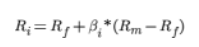

Como BenchMark Usaremos: el S&P/BMV IPC 

In [116]:
	rf=0.0871

In [117]:
IPC=yf.Ticker("^MXX").history(period="2y")
pf_IPC = pd.DataFrame({"IPC":IPC["Close"]})
pf_IPC.head()

,IPC
Date,
2020-07-08,37483.878906
2020-07-09,36795.949219
2020-07-10,36465.460938
2020-07-13,36389.390625
2020-07-14,36190.910156


In [119]:
log_rend_ipc = np.log(pf_IPC['IPC'] / pf_IPC['IPC'].shift(1))
riskpremium = (log_rend_ipc.mean()*250) - rf
riskpremium

0.030758642494586944

In [120]:
log_rend_ipc.mean()*250

0.11785864249458694

In [36]:





b_GAP
b_GFNORTE
b_GMEXICO
b_TLEVISA
b_WALMEX
R_AMX=rf+b_AMX*riskpremium
R_ASUR=rf+b_ASUR*riskpremium
R_BIMBO=rf+b_BIMBO*riskpremium
R_CEMEX=rf+b_CEMEX*riskpremium
R_FEM=rf+b_FEMSA*riskpremium
R_KOF=rf+b_AMX*riskpremium
R_Arca=rf+b_ASUR*riskpremium
R_Oma=rf+b_BIMBO*riskpremium
R_Gruma=rf+b_CEMEX*riskpremium
R_Walmex=rf+b_walmex*riskpremium
cpm=pd.DataFrame({'KOF': R_KOF,'ARCA': R_Arca, 'OMA': R_Oma, 'GRUMA': R_Gruma, 'WALMEX': R_Walmex},index=[1])
cpm

,KOF,ARCA,OMA,GRUMA,WALMEX
1,0.112399,0.114345,0.156186,0.102182,0.113859


# WACC

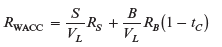

Definimos nuestras Variables

In [37]:
S_KOF=(645 + 83329)*1000000#BONOS
Re_KOF=16806.66*1000000*110.97#ACCIONES
Vl_kof=S_KOF+Re_KOF
S_ARCA=(7953.21+43527	)*1000000
Re_ARCA=1764.28*1000000*129.98
Vl_arca=S_ARCA+Re_ARCA
S_OMA=390.11*1000000*139.880
Re_OMA=(2729.33+4996.62	)*1000000
Vl_oma=S_OMA+Re_OMA
S_GRUMA=(381.03*1000000)*244.76
Re_GRUMA=(94.64+1166.42)*1000000
Vl_gruma=S_GRUMA+Re_GRUMA
S_WALMEX=17461.4*1000000*74.220
Re_WALMEX=(3438.47)*1000000
Vl_walmex=S_WALMEX+Re_WALMEX
t_kof=6609/22852 #Tasa de Impuestos
t_arca=6983.09/22072.4
t_oma=279.11/1031.71	
t_gruma=39.58	/100.77
t_walmex=13157.58/57295.65
bono_kof=0.0736 # Tasa de Bonos
bono_arca=0.0675 
bono_oma=0.0935
bono_gruma=0.07 
bono_walmex=0.05

In [38]:
S_KOF, Re_KOF, Vl_kof, S_ARCA, Re_ARCA, Vl_arca, S_OMA, Re_OMA, Vl_oma, S_GRUMA, Re_GRUMA, Vl_gruma, S_WALMEX,Re_WALMEX, Vl_walmex, t_kof, t_arca, t_oma, t_gruma, t_walmex, bono_kof, bono_arca, bono_oma, bono_gruma, bono_walmex

(83974000000,
 1865035060200.0,
 1949009060200.0,
 51480210000.0,
 229321114399.99997,
 280801324400.0,
 54568586800.0,
 7725950000.0,
 62294536800.0,
 93260902800.0,
 1261060000.0000002,
 94521962800.0,
 1295985108000.0,
 3438470000.0,
 1299423578000.0,
 0.28920882198494663,
 0.3163720302277958,
 0.2705314477905613,
 0.3927756276669644,
 0.2296436116877983,
 0.0736,
 0.0675,
 0.0935,
 0.07,
 0.05)

Calculamos el WACC de cada Empresa

In [39]:
W_kof=(S_KOF/Vl_kof)*R_KOF+(Re_KOF/Vl_kof)*bono_kof*(1-t_kof)
W_arca=(S_ARCA/Vl_arca)*R_Arca+(Re_ARCA/Vl_arca)*bono_arca*(1-t_arca)
W_oma=(S_OMA/Vl_oma)*R_Oma+(Re_OMA/Vl_oma)*bono_oma*(1-t_oma)
W_gruma=(S_GRUMA/Vl_gruma)*R_Gruma+(Re_GRUMA/Vl_gruma)*bono_gruma*(1-t_gruma)
W_walmex=(S_WALMEX/Vl_walmex)*R_Walmex+(Re_WALMEX/Vl_walmex)*bono_walmex*(1-t_walmex)
WACC=pd.DataFrame({'KOF': W_kof,'ARCA': W_arca, 'OMA': W_oma, 'GRUMA': W_gruma, 'WALMEX': W_walmex},index=[1])
WACC

,KOF,ARCA,OMA,GRUMA,WALMEX
1,0.054903,0.058648,0.145274,0.101386,0.113659
